# Standard error (SE)

In [20]:
PATH = "/home/mmahsereci/github/webpage/img/2021-08-31-std/"
SAVE= False

# multiple runs

In [2]:
import numpy as np
np.random.seed(42)

# fair coin
p = 0.5

# Bernoulli samples: 1 means heads, 0 means tails
n_samples = int(1e4)  # more samples than before
n_runs = 1000  # number of runs

# Bernoulli samples: 1 means heads, 0 means tails
samples = 1 * (np.random.rand(n_runs * n_samples) < p)
samples = np.reshape(samples, (n_runs, n_samples))

In [3]:
S = np.cumsum(samples, axis=1)
n =  np.arange(1, n_samples + 1)
means = S / n

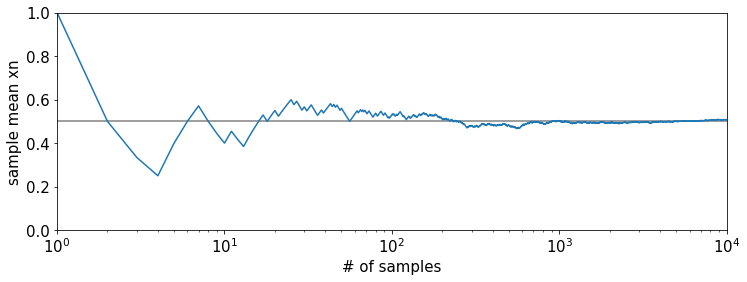

In [4]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(12, 4))
plt.plot(n, means[0, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()

if SAVE:
    plt.savefig(PATH + "00.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


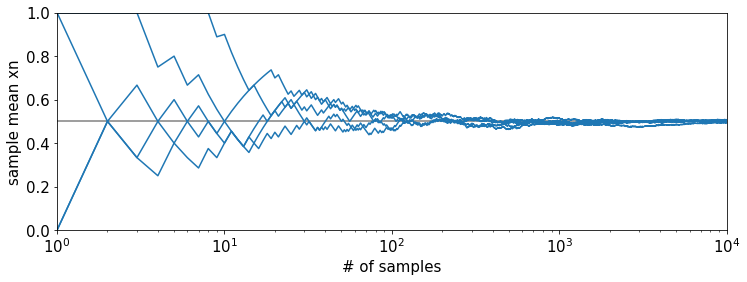

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(n, means[:5, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()

if SAVE:
    plt.savefig(PATH + "01.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


# Standard error exact

In [6]:
variances = 0.25 * np.ones(means.shape) / n
standard_errors = np.sqrt(variances)


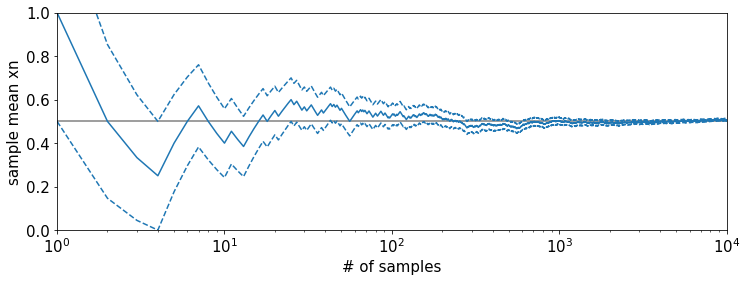

In [7]:

plt.figure(figsize=(12, 4))
plt.plot(n, means[0, :].T + standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T - standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()

if SAVE:
    plt.savefig(PATH + "02.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


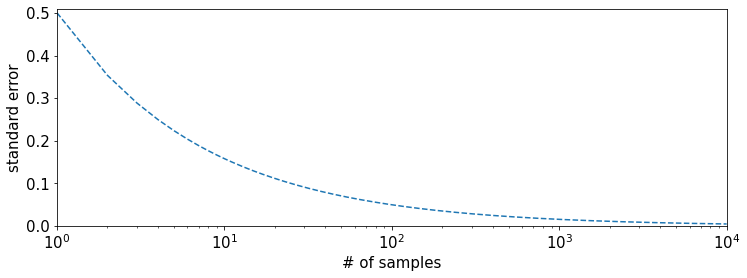

In [21]:

plt.figure(figsize=(12, 4))
plt.plot(n, standard_errors[0, :].T, color='C0', linestyle='dashed')
# plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 0.51])
plt.xlabel("# of samples")
plt.ylabel("standard error")
# plt.show()


if SAVE:
# if True:
    plt.savefig(PATH + "03.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


/tmp/ipykernel_58513/2827049623.py:8: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 0.51])


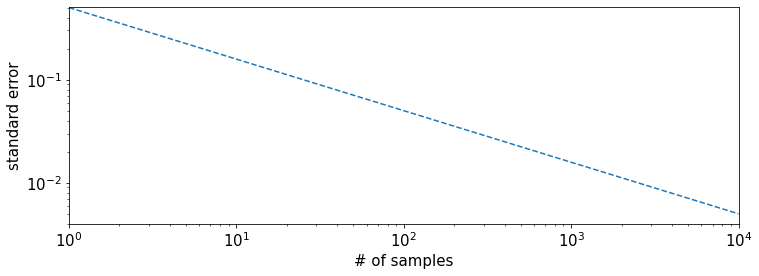

In [22]:

plt.figure(figsize=(12, 4))
plt.plot(n, standard_errors[0, :].T, color='C0', linestyle='dashed')
# plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.yscale("log")

plt.xlim([1, n_samples])
plt.ylim([0, 0.51])
plt.xlabel("# of samples")
plt.ylabel("standard error")
# plt.show()


if SAVE:
# if True:
    plt.savefig(PATH + "03a.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


# Standard error bootstrap

In [10]:
S2 = np.cumsum(samples ** 2, axis=1)  # for Bernoulli random numbers, S and S2 are identical.
variances_bootstrap = (S2 / n - means ** 2) / n
standard_errors_bootstrap = np.sqrt(variances_bootstrap)


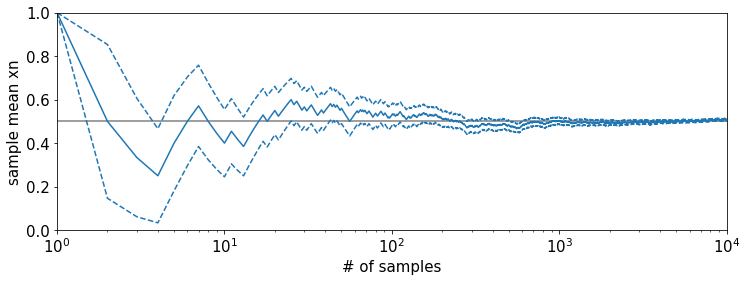

In [11]:

plt.figure(figsize=(12, 4))
plt.plot(n, means[0, :].T + standard_errors_bootstrap[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T - standard_errors_bootstrap[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, means[0, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
# plt.show()


if SAVE:
    plt.savefig(PATH + "04.png", 
                bbox_inches = 'tight',pad_inches = 0.05)


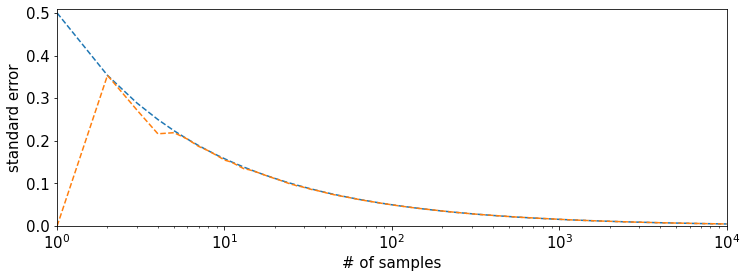

In [24]:

plt.figure(figsize=(12, 4))
plt.plot(n, standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, standard_errors_bootstrap[0, :].T, color='C1', linestyle='dashed')
# plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")

plt.xlim([1, n_samples])
plt.ylim([0, 0.51])
plt.xlabel("# of samples")
plt.ylabel("standard error")
# plt.show()

if SAVE:
# if True:
    plt.savefig(PATH + "05.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

/tmp/ipykernel_58513/580513435.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 0.51])


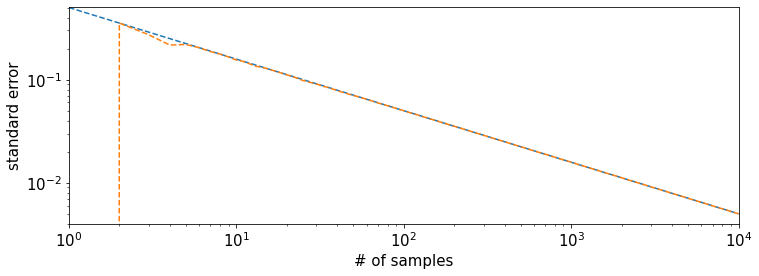

In [25]:

plt.figure(figsize=(12, 4))
plt.plot(n, standard_errors[0, :].T, color='C0', linestyle='dashed')
plt.plot(n, standard_errors_bootstrap[0, :].T, color='C1', linestyle='dashed')
# plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.yscale("log")

plt.xlim([1, n_samples])
plt.ylim([0, 0.51])
plt.xlabel("# of samples")
plt.ylabel("standard error")
# plt.show()

if SAVE:
# if True:
    plt.savefig(PATH + "05a.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

# empirical check of standard error

In [14]:
interval_low = means - standard_errors
interval_up = means + standard_errors

interval_bootstrap_low = means - standard_errors_bootstrap
interval_bootstrap_up  = means + standard_errors_bootstrap

In [15]:
pp = p * np.ones([n_runs, n_samples])

mask = (pp < interval_low) + (pp > interval_up)
inside = 1 - np.mean(mask, axis=0)

mask = (pp < interval_bootstrap_low) + (pp > interval_bootstrap_up)
inside_bootstrap = 1 - np.mean(mask, axis=0)

mask = None
interval_low = None
interval_up = None
interval_bootstrap_low = None
interval_bootstrap_up = None

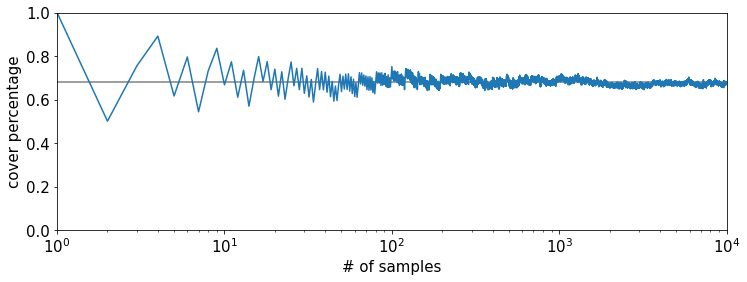

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(n, inside, color='C0')
plt.hlines(0.68, 0, n_samples, colors="gray")
plt.xscale("log")
plt.ylim([0, 1])

plt.xlim([1, n_samples])
plt.xlabel("# of samples")
plt.ylabel("cover percentage")
# plt.show()

if SAVE:
    plt.savefig(PATH + "06.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

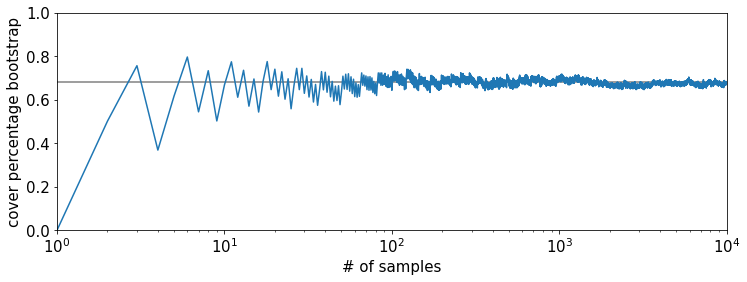

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(n, inside_bootstrap, color='C0')
plt.hlines(0.68, 0, n_samples, colors="gray")
plt.xscale("log")
plt.ylim([0, 1])

plt.xlim([1, n_samples])
plt.xlabel("# of samples")
plt.ylabel("cover percentage bootstrap")
# plt.show()


if SAVE:
    plt.savefig(PATH + "07.png", 
                bbox_inches = 'tight',pad_inches = 0.05)

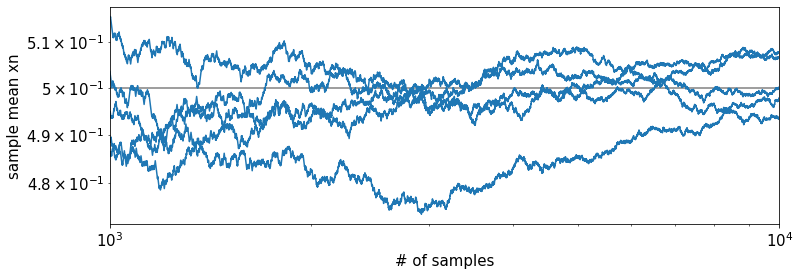

In [18]:
import matplotlib.pyplot as plt

n_plot = 1000

plt.figure(figsize=(12, 4))
# plt.plot(n[n_plot:], means[:5, n_plot:].T + standard_errors[:5, n_plot:].T, color='C0', linestyle='dashed')
# plt.plot(n[n_plot:], means[:5, n_plot:].T - standard_errors[:5, n_plot:].T, color='C0', linestyle='dashed')
plt.plot(n[n_plot:], means[:5, n_plot:].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.yscale("log")

plt.xlim([n_plot, n_samples])
# plt.ylim([0, 1])
plt.xlabel("# of samples")
plt.ylabel("sample mean xn")
plt.show()

# Thumbnail

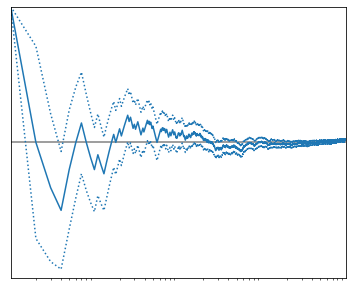

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(n, means[0, :].T + standard_errors_bootstrap[0, :].T, color='C0', linestyle='dotted')
plt.plot(n, means[0, :].T - standard_errors_bootstrap[0, :].T, color='C0', linestyle='dotted')
plt.plot(n, means[0, :].T, color='C0')
plt.hlines(p, 0, n_samples, colors="gray")
plt.xscale("log")
plt.xlim([1, n_samples])
plt.ylim([0, 1])
plt.xticks([])
plt.yticks([])
# plt.show()

if SAVE:
    plt.savefig(PATH + "thumbnail.png", 
                bbox_inches = 'tight',pad_inches = 0.05)
# plt.savefig(PATH + "thumbnail.png", 
#         bbox_inches = 'tight',pad_inches = 0.05)